# Project 1 Face Mask Classifer (3 classes) end-to-end

Goals: Build a 3 class image classifier (with_mask, without_mask, mask_worn_incorrectly) and a tiny local UI.

Definition of Done: > 90% val accuracy, clear confusion matrix, exported model, working local UI, short write-up

## Risk-based priority rule 

If an image has any without_mask -> label = without_mask  
Else if it has any mask_weared_incorrect -> label = mask_weared_incorrect   
Else -> label = with_mask

## Data Preprocessing 


In [7]:
import xml.etree.ElementTree as ET
import csv

csv_file_path = "../data/labels.csv"

with open(csv_file_path, 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)

    writer.writerow(['filename', 'label'])
    
    for i in range(853):
        file = "../data/annotations/maksssksksss" + str(i) + ".xml"
        tree = ET.parse(file)
    
        filename = None
        object_class = None
        
        object_class_counts = {
            "with_mask": 0,
            "without_mask": 0,
            "mask_weared_incorrect": 0
        }
        
        for elem in tree.iter():
            if elem.tag == "filename":
                filename = elem.text
            if elem.tag == "name":
                object_class_counts[elem.text] += 1
                
        if object_class_counts["without_mask"] > 0:
            object_class = "without_mask"
        elif object_class_counts["without_mask"] == 0 and object_class_counts["mask_weared_incorrect"] > 0:
            object_class = "mask_weared_incorrect"
        else:
            object_class = "with_mask"

        row_data = [filename, object_class]
        writer.writerow(row_data)
        csvfile.flush()

## Data Loaders

In [9]:
from fastai.vision.all import *

dls =  ImageDataLoaders.from_csv (
    path="../data",
    csv_fname='labels.csv',
    valid_pct=0.2,
    seed=42,
    folder="images",
    bs=64,
    item_tfms=Resize(224)
)

/home/varun/miniconda3/envs/fastai/lib/python3.11/site-packages/fastai/data/transforms.py:214: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  o = r[c] if isinstance(c, int) or not c in getattr(r, '_fields', []) else getattr(r, c)
/home/varun/miniconda3/envs/fastai/lib/python3.11/site-packages/fastai/data/transforms.py:214: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  o = r[c] if isinstance(c, int) or not c in getattr(r, '_fields', []) else getattr(r, c)


## Training

In [17]:
learn = vision_learner(dls, resnet34, metrics=accuracy)
learn.fine_tune(10, base_lr=1e-3)

epoch,train_loss,valid_loss,accuracy,time
0,1.851879,1.053970,0.582353,00:02


/home/varun/miniconda3/envs/fastai/lib/python3.11/site-packages/fastai/data/transforms.py:214: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  o = r[c] if isinstance(c, int) or not c in getattr(r, '_fields', []) else getattr(r, c)
/home/varun/miniconda3/envs/fastai/lib/python3.11/site-packages/fastai/data/transforms.py:214: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  o = r[c] if isinstance(c, int) or not c in getattr(r, '_fields', []) else getattr(r, c)
/home/varun/miniconda3/envs/fastai/lib/python3.11/site-packages/fastai/data/transforms.py:214: FutureWarning: Series.__getitem__ treating keys as positions is depreca

epoch,train_loss,valid_loss,accuracy,time
0,1.443864,0.947582,0.611765,00:02
1,1.343604,0.914914,0.611765,00:02
2,1.197837,0.911166,0.629412,00:02
3,1.039204,0.918360,0.688235,00:02
4,0.896022,0.917460,0.711765,00:02
5,0.767773,0.910027,0.717647,00:02
6,0.650011,0.931233,0.723529,00:02
7,0.556353,0.940469,0.735294,00:02
8,0.481053,0.937595,0.735294,00:02
9,0.426490,0.935551,0.741176,00:01


/home/varun/miniconda3/envs/fastai/lib/python3.11/site-packages/fastai/data/transforms.py:214: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  o = r[c] if isinstance(c, int) or not c in getattr(r, '_fields', []) else getattr(r, c)
/home/varun/miniconda3/envs/fastai/lib/python3.11/site-packages/fastai/data/transforms.py:214: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  o = r[c] if isinstance(c, int) or not c in getattr(r, '_fields', []) else getattr(r, c)
/home/varun/miniconda3/envs/fastai/lib/python3.11/site-packages/fastai/data/transforms.py:214: FutureWarning: Series.__getitem__ treating keys as positions is depreca

## Evaluation

/home/varun/miniconda3/envs/fastai/lib/python3.11/site-packages/fastai/data/transforms.py:214: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  o = r[c] if isinstance(c, int) or not c in getattr(r, '_fields', []) else getattr(r, c)
/home/varun/miniconda3/envs/fastai/lib/python3.11/site-packages/fastai/data/transforms.py:214: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  o = r[c] if isinstance(c, int) or not c in getattr(r, '_fields', []) else getattr(r, c)
/home/varun/miniconda3/envs/fastai/lib/python3.11/site-packages/fastai/data/transforms.py:214: FutureWarning: Series.__getitem__ treating keys as positions is depreca

/home/varun/miniconda3/envs/fastai/lib/python3.11/site-packages/fastai/data/transforms.py:214: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  o = r[c] if isinstance(c, int) or not c in getattr(r, '_fields', []) else getattr(r, c)
/home/varun/miniconda3/envs/fastai/lib/python3.11/site-packages/fastai/data/transforms.py:214: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  o = r[c] if isinstance(c, int) or not c in getattr(r, '_fields', []) else getattr(r, c)
/home/varun/miniconda3/envs/fastai/lib/python3.11/site-packages/fastai/data/transforms.py:214: FutureWarning: Series.__getitem__ treating keys as positions is depreca

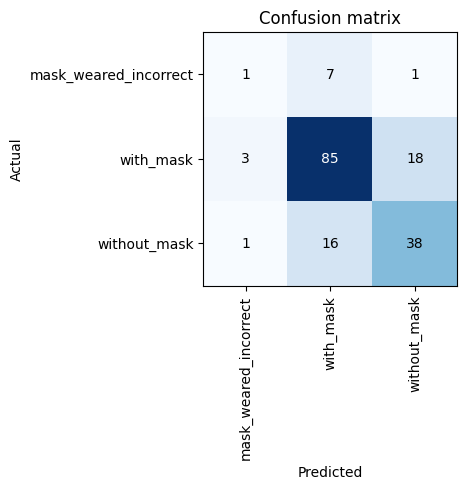

In [11]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()


## Inference

In [13]:
img = PILImage.create("../data/image1.png")
pred_class, pred_idx, probs = learn.predict(img)

print(f"Prediction: {pred_class}")
print(f"Probabilities: {probs}")

Prediction: with_mask
Probabilities: tensor([0.0181, 0.9594, 0.0225])


/home/varun/miniconda3/envs/fastai/lib/python3.11/site-packages/fastai/data/transforms.py:214: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  o = r[c] if isinstance(c, int) or not c in getattr(r, '_fields', []) else getattr(r, c)


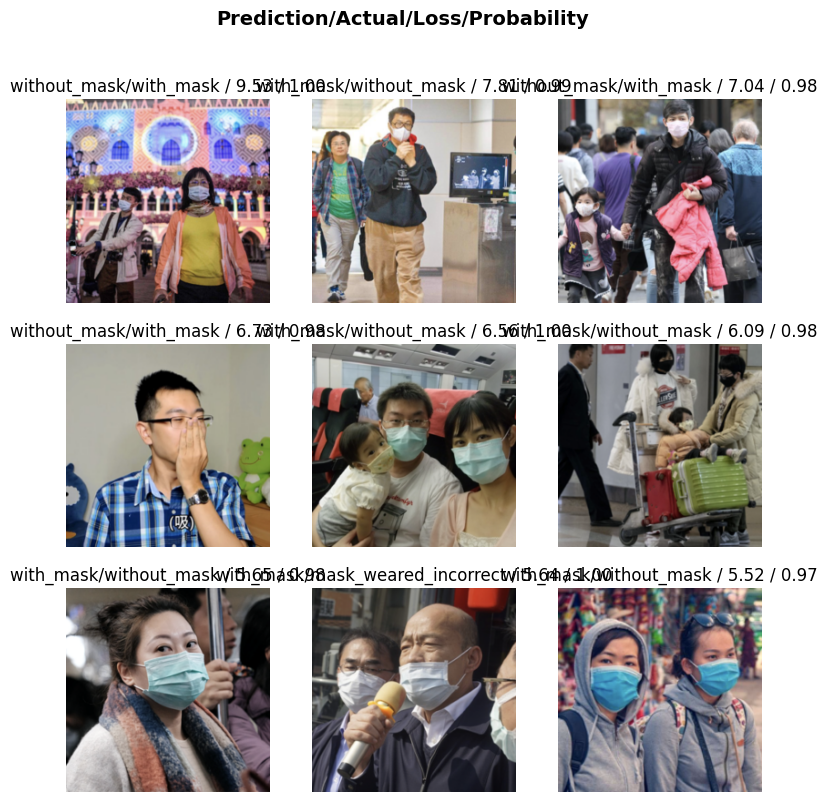

In [15]:
interp.plot_top_losses(9, nrows=3)

## Export and Deployment

In [18]:
learn.export("../models/mask_classifier.pkl")